## Assignment
Andrea Rahmadanisya 1301184146


Import necessary library

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [3]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [5]:
df_can['Total'] = df_can.sum(axis=1)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [13]:
### type your answer here
df_can.columns = list(map(str, df_can.columns))
all(isinstance(column, str) for column in df_can.columns)
df_can.set_index('Country', inplace=True)
years = list(map(str, range(1980, 2014)))

dataframe = df_can.loc[['China', 'India'], years]
dataframe.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

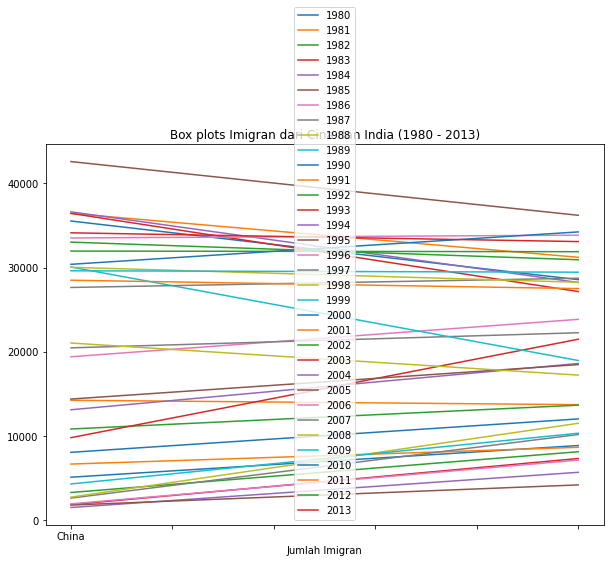

In [30]:
### type your answer here
import matplotlib.pyplot as plt

dataframe.plot(kind='line', figsize=(10, 7))

plt.title('Box plots Imigran dari Cina dan India (1980 - 2013)')
plt.xlabel('Jumlah Imigran')

plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 4 countries

In [51]:
### type your answer here
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top4 = df_can.head(4)
df_top4 = df_top4[years].transpose()

Step 2: Plot graph

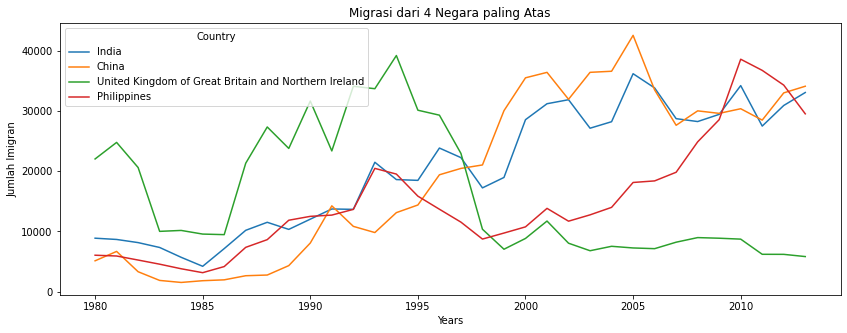

In [72]:
### type your answer here
df_top4.plot(kind='line', figsize=(14, 5))

plt.title('Migrasi dari 4 Negara paling Atas')
plt.ylabel('Jumlah Imigran')
plt.xlabel('Years')
plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

Text(0.5, 0, 'Years')

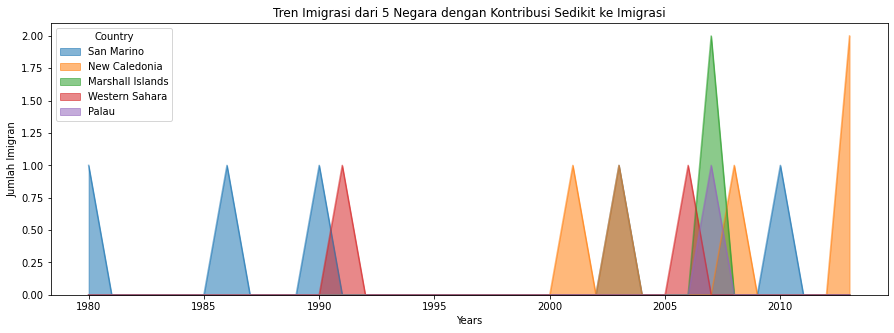

In [56]:
### type your answer here
df_five = df_can.tail(5)

# transpose the dataframe
df_five = df_five[years].transpose() 
df_five.head()

df_five.index = df_five.index.map(int)

y = df_five.plot(kind='area', alpha=0.55, stacked=False, figsize=(15, 5))

y.set_title('Tren Imigrasi dari 5 Negara dengan Kontribusi Sedikit ke Imigrasi')
y.set_ylabel('Jumlah Imigran')
y.set_xlabel('Years')

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

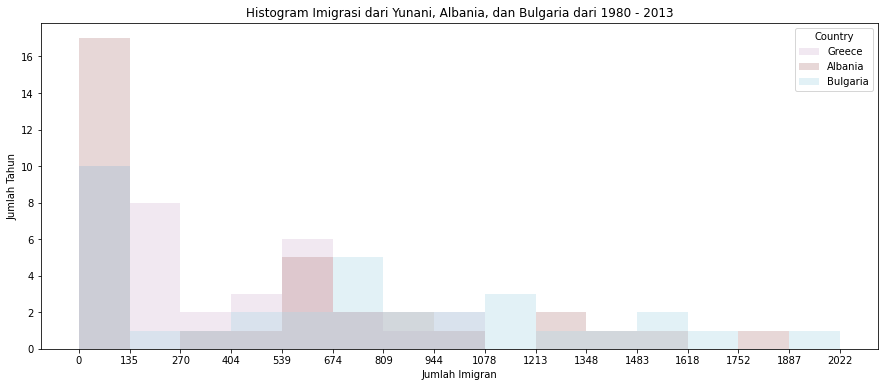

In [71]:
### type your answer here
from tkinter import *

df_q4= df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose() 

# mendapatkan nilai x-tick
count, bin_edges = np.histogram(df_q4, 15)

#Histogram
df_q4.plot(kind ='hist',
            figsize=(15, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['thistle', 'rosybrown', 'lightblue']
            )

plt.title('Histogram Imigrasi dari Yunani, Albania, dan Bulgaria dari 1980 - 2013')
plt.ylabel('Jumlah Tahun')
plt.xlabel('Jumlah Imigran')

plt.show()

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [34]:
### type your answer here
df_can.sort_values(by='Total', ascending=True, inplace=True)

#Top 15 countries
df_q5 = df_can['Total'].tail(15)

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

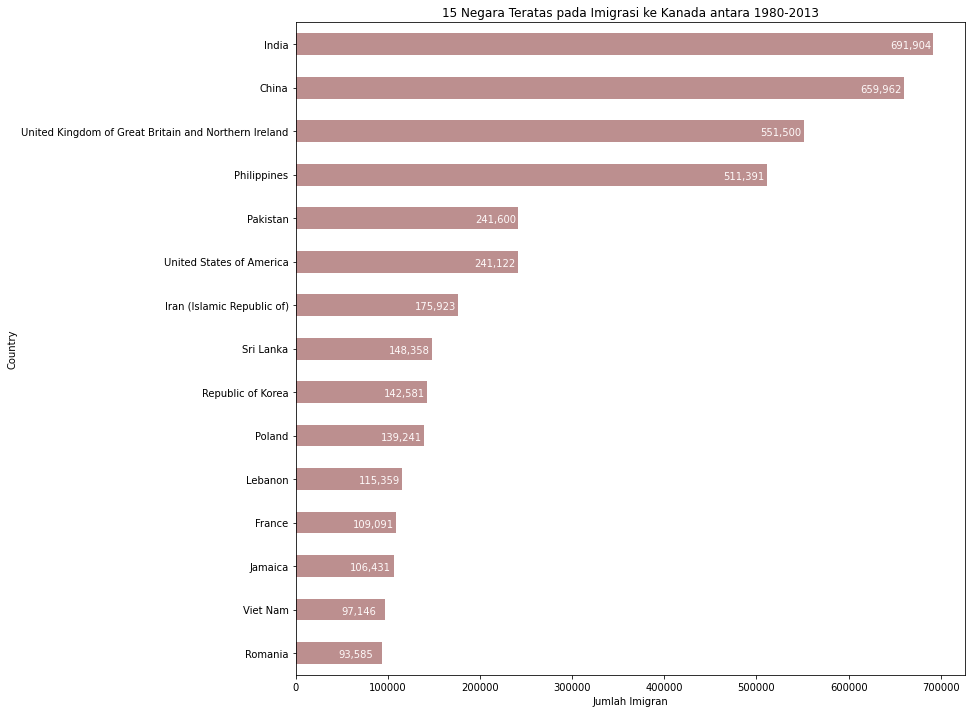

In [70]:
### type your answer here
df_q5.plot(kind='barh', figsize=(12, 12), color='rosybrown')
plt.xlabel('Jumlah Imigran')
plt.title('15 Negara Teratas pada Imigrasi ke Kanada antara 1980-2013')

#Nilai untuk setiap negara
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') 
    
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='snow')

plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).